# Lecture 6 Notebook

1. White board stuff
2. euler_1d.py
3. Example

In [1]:
%cd '/home/cody/Physics 331/Textbook Programs/Chapter 4'
%ls

/home/cody/Physics 331/Textbook Programs/Chapter 4
'Error vs Run Time.png'  'READ ME.txt'   sky_diver.py
 euler_1d.py              rk2_1d.py      Untitled.ipynb


In [2]:
%%writefile euler_1d.py
import numpy as np
def euler_1d(y0, t0, tf, dt, deriv_func):
    """
    Numerically solve the first order ODE deriv_func using Eulers method

    Inputs
    ----------
    y0:         Starting dependent-variable value
    t0, tf:     Starting and ending independent-variable value
    dt:         Size of the step I want to take.
    deriv_func: Function that I am trying to numerically solve.

    Outputs
    ----------
    t: Array of independent-variable values
        t = [t[0], t[1], t[2], ..., t[n_steps]]
    y: Array of corresponding dependent-variable values
        y = [y[0], y[1], y[2], ..., y[n_steps]]
    """

    t = np.arange(t0, tf+dt, dt)   #starts at t0 and makes steps of size dt. Does not
                                   #get to tf. It gets as Close as it can to tf, but
                                   #will always stop short of it.
    n_steps = len(t)        #Number of steps to take
    y = np.zeros(n_steps)   #I want to make an array of zeros that I'll then put
                            #y-values into. This is a good practice because it
                            #forces the computer to allocate enough memory for the
                            #final answer and can prevent memory problems
 
    #Set the first element of the array to be our input starting value y0
    y[0] = y0
    for n in range(n_steps-1):
        f = deriv_func(y[n], t[n])  #Evaluate the function f(y,t)
        y[n+1] = (y[n] + dt * f)    #This is the Euler's method part.
    return t, y


Overwriting euler_1d.py


In [3]:
%run euler_1d.py

### Blackbody radiation
Planck was crazy and said that light is in little packets called photons, and that they had energy related to their frequency. Then you could think about having an oven full of a photon gas. This oven is insulated so the total energy of the oven is constant $dE = dV = 0$. The number of photons could change as they get absorbed or emmited by the walls of the oven. After a bit of math (see  Stowe Chapter 21) you end up with a differential equation for the energy dencity and wavelength

\begin{equation}
	\frac{du}{d\lambda} = \frac{8\pi hc}{\lambda^5(e^{hc/\lambda kT} - 1)}
\end{equation}

This is a first order ODE that is doable, but I'm lazy and don't want to do it, so lets make the computer do it!

First lets plot $du/d\lambda$ for fun

In [4]:
import numpy as np
def dudl(u,lam):
    h = 6.62607e-34 #Planks constant (Js)
    c = 299792458   #Speed of light (m/s)
    k = 1.38064e-23 #Boltzman constant (J/K)
    T = 5777        #Effective temp of the Sun (K)
    beta = 1/(k*T)
    alpha = beta * h * c / lam
    return (8*np.pi*h*c) / (lam**5 * (np.exp(alpha) - 1))

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13,10))
lams = np.linspace(100e-9,6000e-9, 1000000) #Range from 100nm to 3000nm 
plt.plot(lams, dudl(None,lams))
plt.xlabel('Wave length (m)',size = 16) 
plt.ticklabel_format(style = 'sci', scilimits = (0,0))
plt.title('Blackbody Curve for the Sun ($T_{eff} = 5777K$)', size = 16)
plt.ylabel('$du / d\lambda$', rotation = 0, labelpad=25, size = 16)
plt.show()

<Figure size 1300x1000 with 1 Axes>

In [6]:
la, u = euler_1d(0, 100e-9, 6000e-9, 1e-11, dudl)

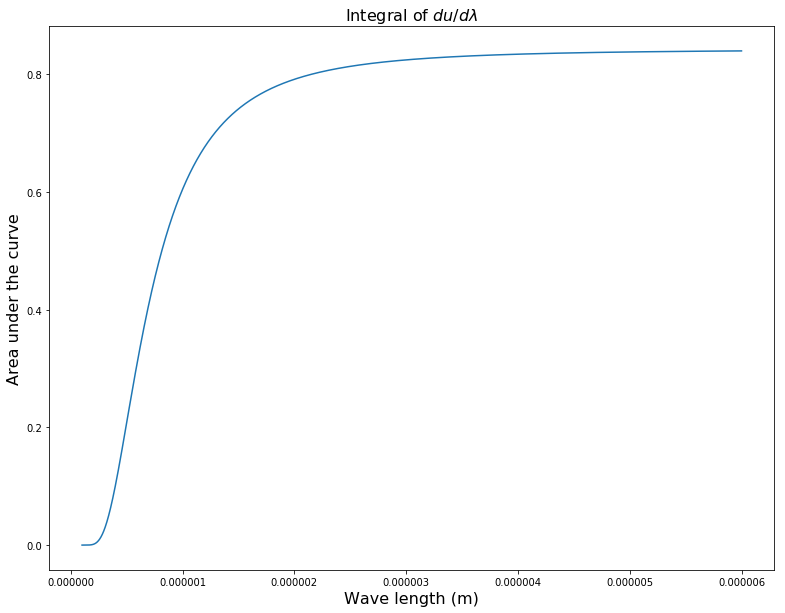

In [7]:
plt.figure(figsize = (13,10))
plt.plot(la,u)
plt.xlabel('Wave length (m)', size = 16)
plt.ylabel('Area under the curve' ,size = 16)
plt.title('Integral of $du/d\lambda$', size = 16)
plt.show()

This is the integral of the first figure. We can see that the integral gets close to an asymptote. Lets look at what this value is,

In [8]:
u[-1]

0.840015241739719

We can compaire this to the analytical solution, where the total energy dencity over all wavelengths is,
\begin{equation}
u = \frac{8\pi^5 k^4}{15 h^3 c^3} T^4 = aT^4
\end{equation}

In [9]:
h = 6.62607e-34 #Planks constant (Js)
c = 299792458   #Speed of light (m/s)
k = 1.38064e-23
a = (8*np.pi**5 * k**4) / (15 * h**3 * c**3)
a*(5777)**4

0.842653832912817

### More examples!
Lets look at a common type of first order ODE in science, exponentials.
Radio active decay is given by,

\begin{equation}
\frac{dN}{dt} = -\lambda N
\end{equation}


In [10]:
def dNdt(N,t):
    """
    Differential equation for radioactive decay dN/dt = -lamda*N
    
    Inputs
    ----------
    N:  Number of atoms
    t:  time
    
    Output
    ----------
    dN/dt:  Right hand side of the differential we want to solve
    """
    lam = 3.9e-12 #Decay constant for Carbon 14 half life of about 5700 years (s**-1)
    return -lam*N

#Exact solution
def decay(N0, lam,t):
    return N0 * np.exp(-lam*t)

In [11]:
num_of_atoms = 6.022e23 #Number of atoms I want to start with
year = 3.154e7 #Number of seconds in a year
t_final = 50000*year #How long I want to wait for this to decay. (10,000 Years) (s)
dt = 5000*year 
t, N = euler_1d(num_of_atoms, 0, t_final, dt, dNdt)
t2, N2 = euler_1d(num_of_atoms, 0, t_final, dt/2, dNdt)

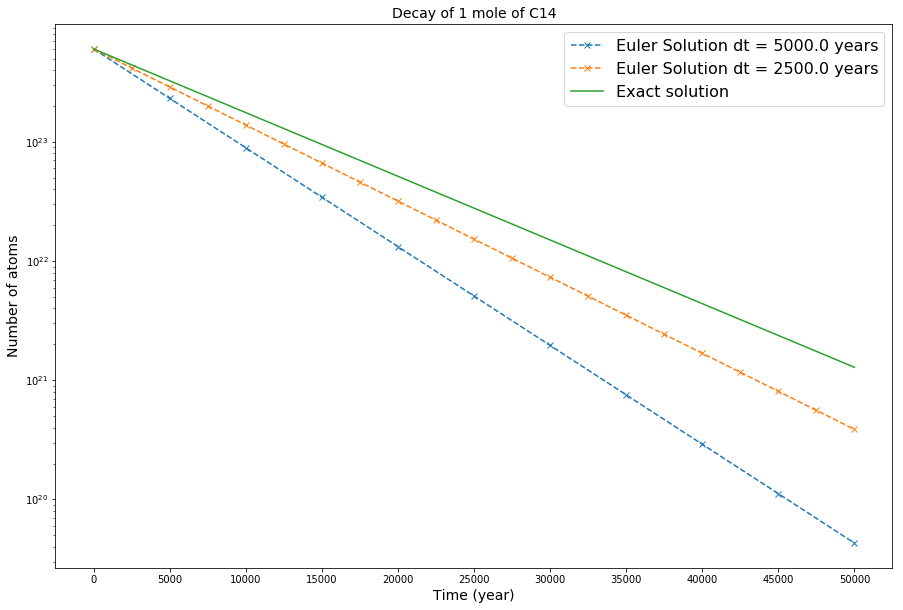

In [12]:
plt.figure(figsize = (15,10))
plt.plot(t,N, 'x--', label = 'Euler Solution dt = {} years'.format(dt/year)) #Plot our numerical solution
plt.plot(t2, N2, 'x--', label = 'Euler Solution dt = {} years'.format(dt/2/year))

t_foo = np.linspace(0, t_final, 1000000)
plt.plot(t_foo,decay(num_of_atoms, 3.9e-12, t_foo), label = 'Exact solution')  #Plot the exact solution

plt.ylabel('Number of atoms', size = 14)
plt.yscale('log')

#Rescale the labels on the x axis to be in years
plt.xticks(np.arange(0, t_final+5000, 5000*year), range(0, int(t_final/year)+5000, 5000))
plt.xlabel('Time (year)', size = 14)

plt.title('Decay of 1 mole of C14', size = 14)
plt.legend(prop={'size': 16})

plt.show()

Notice that the yaxis is on a log scale. This is nice to look at order of magnitude changes. Without it, it's hard to tell what's happening when the number of atoms starts getting smaller. 

### Another example
Here's just some random differential equation
\begin{equation}
\frac{dy}{dx} + 4y = x^2
\end{equation}
with initial condition $y(0) = 1$

In [13]:
def dydx(y,x):
    return x**2 - 4*y

In [14]:
x,  y  = euler_1d(1, 0, 3, 0.5,  dydx)
x2, y2 = euler_1d(1, 0, 3, 0.1, dydx)

In [15]:
#There is an analytical solution to this, that looks like...
def solution(x):
    return (31/32)*np.exp(-4*x) + x**2/4 - x/8 + 1/32

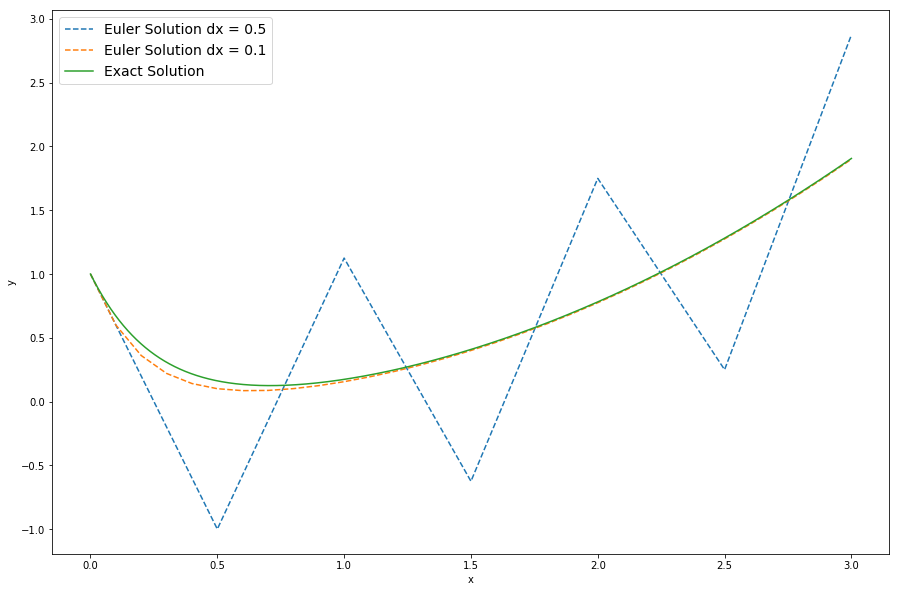

In [16]:
plt.figure(figsize = (15,10))
plt.plot(x, y, '--', label = 'Euler Solution dx = {}'.format(0.5)) #Plot our numerical solution
plt.plot(x2, y2, '--', label = 'Euler Solution dx = {}'.format(0.1))

x_foo = np.linspace(0,3,10000)
plt.plot(x_foo, solution(x_foo), label = 'Exact Solution')
plt.legend(prop = {'size':14})
plt.ylabel('y')
plt.xlabel('x')
plt.show()